In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import blip_analysis as ba
from sklearn.decomposition import PCA
from copy import deepcopy
from tqdm import trange
from matplotlib.gridspec import GridSpec
import json
from label_axes import label_axes
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

b


In [2]:
def scatter_pcs(ax=None, alpha=0.5):
    ''' Plot the PCs of the data scattered in 2D'''
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, aspect='equal')
    markers = style_params['odour_markers']
    edge_color = style_params['odour_edgecolor']
    labels = style_params['odour_labels']
    colors = style_params['odour_colors']
    plt.scatter(fit_bins_all[:130, 0], fit_bins_all[:130, 1], c=colors[0], label=labels[0], marker=markers[0], alpha=alpha, edgecolors=edge_color)
    plt.scatter(fit_bins_all[130:260, 0], fit_bins_all[130:260, 1], c=colors[1], label=labels[1], marker=markers[1], alpha=alpha, edgecolors=edge_color)
    plt.scatter(fit_bins_all[260:, 0], fit_bins_all[260:, 1], c=colors[2], label=labels[2], marker=markers[2], alpha=alpha, edgecolors=edge_color)
    plt.legend()
    #plt.scatter(fit_bins_all[:, 0], fit_bins_all[:, 1], c=cs, label='All', marker=marker)
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    max_lim = np.max(abs(np.concatenate([xlims, ylims])))
    ax.set_ylim(-max_lim, max_lim)
    ax.set_xlim(-max_lim, max_lim)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    return ax

def plot_heatmaps(gs):
    ''' Plot the laplace modelled, true and difference heatmaps of the data'''
    sub_gs = gs.subgridspec(1, 3)

    fig = plt.gcf()
    ax = [fig.add_subplot(sub_gs[i]) for i in range(3)]
    
    h, x, y, p  = ax[0].hist2d(rand1, rand2, bins=[np.linspace(-2.5, 2.5, 20), np.linspace(-2.5, 2.5, 20)], density=True);

    h1, x1, y1, p1 = ax[1].hist2d(fit_bins_all[:, 0], fit_bins_all[:, 1], bins=[np.linspace(-2.5, 2.5, 20), np.linspace(-2.5, 2.5, 20)], density=True);

    max_h = np.max([np.max(h), np.max(h1)])
    p1.set_clim(0, max_h)
    p.set_clim(0, max_h)
    plt.draw()

    ax[0].set_aspect('equal') 
    ax[1].set_aspect('equal')
    vmax =0.3 #¢np.max(abs(h1-h))/2
    im = ax[2].imshow(np.array(h1-h).T, cmap='bwr', vmax=vmax, vmin=-vmax, extent=[-2.5, 2.5, -2.5, 2.5], interpolation='gaussian', origin='lower')
    plt.colorbar(ax=ax[1], mappable=p1, shrink=0.72)
    plt.colorbar(ax=ax[2], mappable=im, shrink=0.72)
    init_ax_pos = ax[0].get_position()
    ax[0].set_position([init_ax_pos.x0, ax[1].get_position().y0, ax[1].get_position().width,  ax[1].get_position().height])
    ax[0].set_title('Laplace fit')
    ax[1].set_title('True')
    ax[2].set_title('Difference')
    ax[1].set_yticklabels([])
    ax[0].set_ylabel('PC2')
    ax[0].set_xlabel('PC1')
    ax[1].set_xlabel('PC1')
    ax[2].set_xlabel('PC1')
    ax[2].set_ylabel('PC2')
    return ax

In [3]:
### Load in the data
unit_usrt1, unit_usrt2, unit_usrt3 = ba.load_usrts()
good_indexes = ba.get_stable_resp_indexes()
glyphs = ba.get_glyphs()
diff_models1 = pickle.Unpickler(open('../Data/230320_diff_models1.pkl', 'rb')).load()
diff_models2 = pickle.Unpickler(open('../Data/230320_diff_models2.pkl', 'rb')).load()
diff_models3 = pickle.Unpickler(open('../Data/230320_diff_models3.pkl', 'rb')).load()
onset_models1 = pickle.Unpickler(open('../Data/230320_onset_models1.pkl', 'rb')).load()
conc_models1 = pickle.Unpickler(open('../Data/230320_conc_models1.pkl', 'rb')).load()
style_params = json.load(open('../Data/style_params.json', 'r'))



Found odour 1
Found odour 3
Found odour 5


In [4]:
style_params = json.load(open('../Data/style_params.json', 'r'))

In [5]:
## Extract the bins fro the models
bins1 = np.array([[j.x[:-1] for j in i.training_opts] for i in diff_models1]).mean(axis=1)
bins2 = np.array([[j.x[:-1] for j in i.training_opts] for i in diff_models2]).mean(axis=1)
bins3 = np.array([[j.x[:-1] for j in i.training_opts] for i in diff_models3]).mean(axis=1)

all_preds = [i.pred_resp for i in diff_models1] + [i.pred_resp for i in diff_models2] + [i.pred_resp for i in diff_models3]
all_trues = [i.true_resp for i in diff_models1] + [i.true_resp for i in diff_models2] + [i.true_resp for i in diff_models3]


In [6]:
### apply PCA to the bins
pca1 = PCA(n_components=9)
fit_bins1 = pca1.fit_transform(bins1)
fit_1_pc12 = deepcopy(fit_bins1)
fit_1_pc12[:, 2:] = 0
bins_1_pc12 = pca1.inverse_transform(fit_1_pc12)


pca2 = PCA(n_components=9)
fit_bins2 = pca2.fit_transform(bins2)
fit_2_pc12 = fit_bins2.copy()
fit_2_pc12[:, 2:] = 0
bins_2_pc12 = pca2.inverse_transform(fit_2_pc12)

pca3 = PCA(n_components=9)
fit_bins3 = pca3.fit_transform(bins3)
fit_3_pc12 = fit_bins3.copy()
fit_3_pc12[:, 2:] = 0
bins_3_pc12 = pca3.inverse_transform(fit_3_pc12)

pca_all = PCA(n_components=9)
all_bins = np.concatenate([bins1 , bins2 , bins3], axis=0)
fit_bins_all = pca_all.fit_transform(all_bins)
fit_all_pc12 = fit_bins_all.copy()
fit_all_pc12[:, 2:] = 0
bins_all_pc12 = pca_all.inverse_transform(fit_all_pc12)



In [7]:
print(np.sum(pca1.explained_variance_ratio_[:2]))
print(np.sum(pca2.explained_variance_ratio_[:2]))
print(np.sum(pca3.explained_variance_ratio_[:2]))
print(np.sum(pca_all.explained_variance_ratio_[:2]))

0.8621654751000427
0.8803327339158681
0.8020804012566036
0.8441193691203266


In [8]:
## Find the correlation between the PCs
corrs = []
for i in range(9):
    flat_triag = np.triu(np.corrcoef([pca1.components_[i], pca2.components_[i], pca3.components_[i]]), 1).flatten()
    flat_triag = flat_triag[flat_triag != 0]
    corrs.append(flat_triag)

In [9]:
### Normalise the change in the fit error for each cell as the number of PC increases
all_normed = []
for index in trange(100):
    first_pass_bins = np.array([i.training_opts[index].x[:-1] for i in diff_models1])
    threshes = np.array([i.training_opts[index].x[-1] for i in diff_models1])
    pca = PCA(n_components=9)

    all_fit_errors = []
    all_pred_resps = []
    for pcs in range(0, 10):
        pcad_bins = pca.fit_transform(first_pass_bins)
        pcad_bins[:, pcs:] = 0
        pcad_bins = pca.inverse_transform(pcad_bins)
        [model.fit(W=i.tolist() + [j]) for model, i, j in zip(diff_models1, pcad_bins, threshes)];
        pred_resps = [i.pred_resp for i in diff_models1]
        all_pred_resps.append(pred_resps)
        fit_errors = [np.sum((i.X_test_avg[index] - j)**2) for i, j in zip(diff_models1, pred_resps)]
        all_fit_errors.append(fit_errors)
    all_fit_errors = np.array(all_fit_errors)
    all_pred_resps = np.array(all_pred_resps)
    normed =( all_fit_errors - all_fit_errors.min(axis=0)) / (all_fit_errors.max(axis=0) - all_fit_errors.min(axis=0))
    # for i in normed.T:
    #     plt.plot(i, alpha=0.5, color='lightgray')
    # plt.plot(normed.mean(axis=1))
    # plt.xlabel('Number of PCs')
    # plt.ylabel('Normalized Fit Error')
    all_normed.append(normed)


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:17<00:00,  5.74it/s]


In [10]:
### Generate the laplace distributions along both of the PCs
pc1_exp_decay = np.abs([i - np.median(fit_bins_all[:, 0]) for i in fit_bins_all[:, 0]]).mean()
pc2_exp_decay = np.abs([i - np.median(fit_bins_all[:, 1]) for i in fit_bins_all[:, 1]]).mean()
rand1 = np.random.laplace(0, pc1_exp_decay, 10000)
rand2 = np.random.laplace(0, pc2_exp_decay, 10000)

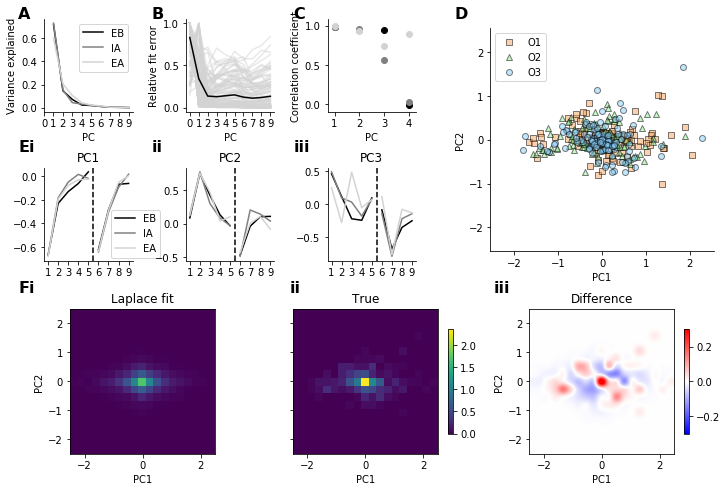

In [11]:
### Plotting

# Colors and markers
odour_grays = ['k', 'gray', 'lightgray']
markers = ['o', 's', 'd']


fig = plt.figure(figsize=(12, 8))
gs = GridSpec(5, 5, hspace=1, wspace=1)
sub_gs = gs[:3, :3].subgridspec(2, 3, wspace=0.6, hspace=0.6)

### Add the explained variance ratio axis
pc_var_ax = fig.add_subplot(sub_gs[0, 0])
pc_var_ax.plot(range(1, 10), pca1.explained_variance_ratio_, label='EB', color=odour_grays[0])
pc_var_ax.plot(range(1, 10), pca2.explained_variance_ratio_, label='IA', color=odour_grays[1])
pc_var_ax.plot(range(1, 10), pca3.explained_variance_ratio_, label='EA', color=odour_grays[2])
pc_var_ax.set_ylabel('Variance explained')
pc_var_ax.set_xlabel('PC')
pc_var_ax.spines['right'].set_visible(False)
pc_var_ax.spines['top'].set_visible(False)
pc_var_ax.set_xticks(range(0, 10))
pc_var_ax.legend()

### Add the change in fit error against number of PCs axis
pc_error_ax = fig.add_subplot(sub_gs[0, 1])
mean_normed = np.array(all_normed).mean(axis=0)
for i in mean_normed.T:
    pc_error_ax.plot(i, alpha=0.5, color='lightgray')
pc_error_ax.plot(mean_normed.mean(axis=-1), color='k')
pc_error_ax.spines['right'].set_visible(False)
pc_error_ax.spines['top'].set_visible(False)
pc_error_ax.set_ylabel('Relative fit error')
pc_error_ax.set_xlabel('PC')
pc_error_ax.set_xticks(range(0, 10))

### Add the correlation between PCs axis
corr_ax = fig.add_subplot(sub_gs[0, 2])
corr_ax.scatter(range(1, 5), np.array(corrs)[:4, 0], color=odour_grays[0])
corr_ax.scatter(range(1, 5), np.array(corrs)[:4, 1], color=odour_grays[1])
corr_ax.scatter(range(1, 5), np.array(corrs)[:4, 2], color=odour_grays[2])
corr_ax.set_ylabel('Correlation coefficient')
corr_ax.set_xlabel('PC')
corr_ax.set_xticks(range(1, 5))
corr_ax.spines['right'].set_visible(False)
corr_ax.spines['top'].set_visible(False)

### Add the PC1, PC2, PC3 axes
pc1_ax = fig.add_subplot(sub_gs[1, 0])
pc2_ax = fig.add_subplot(sub_gs[1, 1])
pc3_ax = fig.add_subplot(sub_gs[1, 2])

# Plot PC1, PC2, PC3 on these axes
pc_axs = [pc1_ax, pc2_ax, pc3_ax]
for i in range(3):
    pc_axs[i].plot(pca1.components_[i][:5], color=odour_grays[0], label='EB')
    pc_axs[i].plot(pca2.components_[i][:5], color=odour_grays[1], label='IA')
    pc_axs[i].plot(pca3.components_[i][:5], color=odour_grays[2], label='EA')

    pc_axs[i].plot(range(5, 9), pca1.components_[i][5:], color=odour_grays[0])
    pc_axs[i].plot(range(5, 9), pca2.components_[i][5:], color=odour_grays[1])
    pc_axs[i].plot(range(5, 9), pca3.components_[i][5:], color=odour_grays[2])
    
    pc_axs[i].spines['right'].set_visible(False)
    pc_axs[i].spines['top'].set_visible(False)
    pc_axs[i].set_title(f'PC{i+1}')
    pc_axs[i].set_xticks(range(9))
    pc_axs[i].set_xticklabels(range(1,10))
    pc_axs[i].axvline(4.5, color='k', linestyle='--')

pc_axs[0].legend(bbox_to_anchor=(0.7, 0.6))


### The scatter plot
scatter_ax = fig.add_subplot(gs[:3, 3:], aspect='equal')
scatter_pcs(scatter_ax)
heatmap_axs = plot_heatmaps(gs[3:, :])

### Labelling
axes = [pc_var_ax, pc_error_ax, corr_ax, scatter_ax, pc1_ax, pc2_ax, pc3_ax, *heatmap_axs]
labels = ['A', 'B', 'C', 'D', 'Ei', 'ii', 'iii', 'Fi', 'ii', 'iii']
x_aligns = [[0, 4, 7], [1, 5], [2, 6]]
y_aligns = [[0, 1, 2, 3], [4, 5, 6], [7, 8, 9]]

label_axes.label_axes(axes, labels, align_x=x_aligns, align_y=y_aligns, fontsize=16, fontweight='bold')
#plt.savefig('230703_fig5.pdf', bbox_inches='tight')

['O1', 'O2', 'O3']


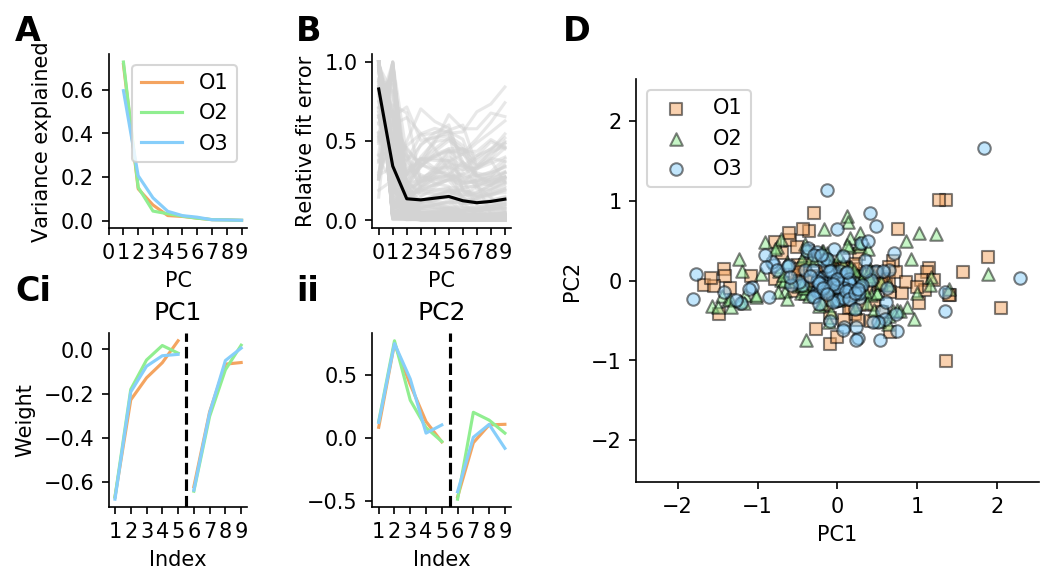

In [12]:
style_params = json.load(open('../Data/style_params.json', 'r'))
fig = plt.figure(figsize=(8, 4), dpi=150)
gs = fig.add_gridspec(2, 4, hspace=0.6, wspace=0.9)
odour_colors = style_params['odour_colors']
odour_labels = style_params['odour_labels']
pc_var_ax = fig.add_subplot(gs[0, 0])
print(odour_labels)
pc_var_ax.plot(range(1, 10), pca1.explained_variance_ratio_, label=odour_labels[0], color=odour_colors[0])
pc_var_ax.plot(range(1, 10), pca2.explained_variance_ratio_, label=odour_labels[1], color=odour_colors[1])
pc_var_ax.plot(range(1, 10), pca3.explained_variance_ratio_, label=odour_labels[2], color=odour_colors[2])
pc_var_ax.set_ylabel('Variance explained')
pc_var_ax.set_xlabel('PC')
pc_var_ax.spines['right'].set_visible(False)
pc_var_ax.spines['top'].set_visible(False)
pc_var_ax.set_xticks(range(0, 10))
pc_var_ax.legend()
### Add the change in fit error against number of PCs axis
pc_error_ax = fig.add_subplot(gs[0, 1])
mean_normed = np.array(all_normed).mean(axis=0)
for i in mean_normed.T:
    pc_error_ax.plot(i, alpha=0.5, color='lightgray')
pc_error_ax.plot(mean_normed.mean(axis=-1), color='k')
pc_error_ax.spines['right'].set_visible(False)
pc_error_ax.spines['top'].set_visible(False)
pc_error_ax.set_ylabel('Relative fit error')
pc_error_ax.set_xlabel('PC')
pc_error_ax.set_xticks(range(0, 10))

### Add the PC1, PC2, PC3 axes
pc1_ax = fig.add_subplot(gs[1, 0])
pc2_ax = fig.add_subplot(gs[1, 1])



# Plot PC1, PC2, PC3 on these axes
pc_axs = [pc1_ax, pc2_ax]
for i in range(2):
    pc_axs[i].plot(pca1.components_[i][:5], color=style_params['odour_colors'][0], label=style_params['odour_labels'][0])
    pc_axs[i].plot(pca2.components_[i][:5], color=style_params['odour_colors'][1], label=style_params['odour_labels'][1])
    pc_axs[i].plot(pca3.components_[i][:5], color=style_params['odour_colors'][2], label=style_params['odour_labels'][2])

    pc_axs[i].plot(range(5, 9), pca1.components_[i][5:], color=odour_colors[0])
    pc_axs[i].plot(range(5, 9), pca2.components_[i][5:], color=odour_colors[1])
    pc_axs[i].plot(range(5, 9), pca3.components_[i][5:], color=odour_colors[2])
    
    pc_axs[i].spines['right'].set_visible(False)
    pc_axs[i].spines['top'].set_visible(False)
    pc_axs[i].set_title(f'PC{i+1}')
    pc_axs[i].set_xticks(range(9))
    pc_axs[i].set_xticklabels(range(1,10))
    pc_axs[i].axvline(4.5, color='k', linestyle='--')

pc1_ax.set_ylabel('Weight')
pc1_ax.set_xlabel('Index')
pc2_ax.set_xlabel('Index')
#pc_axs[1].legend(bbox_to_anchor=(0.7, 0.5))
scatter_ax = fig.add_subplot(gs[:, 2:], aspect='equal')
scatter_pcs(scatter_ax)
axes = [pc_var_ax, pc_error_ax, pc1_ax, pc2_ax, scatter_ax]
labels = ['A', 'B', 'Ci', 'ii', 'D']
align_x = [[0, 2], [1, 3]]
align_y = [[0, 1, 4], [2, 3]]
label_axes.label_axes(axes, labels, fontsize=16, fontweight='bold', align_x=align_x, align_y=align_y, align_y_fun=np.max, align_x_fun=np.min)
plt.savefig('230908_Fig5.pdf', bbox_inches='tight')